In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Hard Margin SVM

In [20]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1])

In [21]:
X.shape

(2, 20)

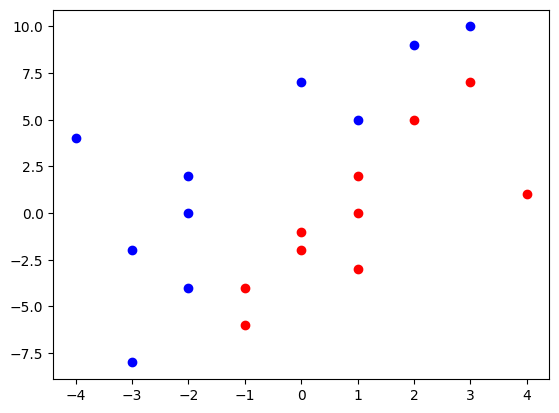

In [22]:
plt.scatter(X[0,:][y == 1], X[1,:][y == 1], color = 'red')
plt.scatter(X[0,:][y == -1], X[1,:][y == -1], color = 'blue')
plt.show()

In [23]:
Y = np.diag(y)
Y

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

Objective function of dual problem finds the optimum alpha:
$$
\max_{\alpha>=0} \alpha^{T}1-\frac{1}{2} \alpha^T Y^T X^T XY \alpha
$$
Such that:
$$
Q = Y^T X^T XY
$$

In [24]:
Q = Y.T @ X.T @ X @ Y

Since the Scipy library can only minimize variables, the objective function can be rewritten as:
$$
\min \limits_{\boldsymbol{\alpha} \geq 0} f(\alpha)
$$
Where 
$$
f(\alpha) = \alpha^{*} = \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

In [25]:
def obj_func(alpha):
    return 0.5 * alpha.T @ Q @ alpha - np.sum(alpha.T) 

In [26]:
print(obj_func(np.ones(X.shape[1])))

468.0


In [27]:
from scipy import optimize
alpha_init = np.zeros(X.shape[1])
result = optimize.minimize(obj_func, alpha_init, bounds = optimize.Bounds(0, np.inf))

In [28]:
alpha_star = result.x
alpha_star

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.64285423, 1.65714107, 1.67142733, 1.68571295,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428375, 1.62856723])

Support vectors are those for whom $\alpha^{*} > 0$

In [29]:
for i in range(len(alpha_star)):
    if alpha_star[i]>0:
        print(i)

6
7
8
9
18
19


Optimal vector $w^{*}$ of the primal problem
$$
w^{*}=XY\alpha^{*}
$$

In [30]:
w_star = X @ Y @ alpha_star
w_star

array([ 2.99998703, -1.00002545])

Supporting hyperplanes are:
$$
y = \frac{1}{w_{1}} - \frac{w_{0}}{w_{1}}*x
$$
And
$$
y = -\frac{1}{w_{1}} - \frac{w_{0}}{w_{1}}*x
$$

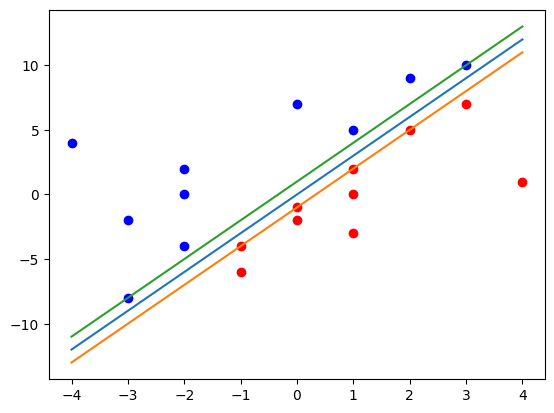

In [31]:
plt.scatter(X[0,:][y == 1], X[1,:][y == 1], color = 'red')
plt.scatter(X[0,:][y == -1], X[1,:][y == -1], color = 'blue')
x_db = np.linspace(-4, 4)
y_db = -w_star[0]/w_star[1]*x_db
plt.plot(x_db, y_db)
y_hyperplane1 = 1/w_star[1] - w_star[0]/w_star[1] * x_db
y_hyperplane2 = -1/w_star[1] - w_star[0]/w_star[1] * x_db
plt.plot(x_db, y_hyperplane1)
plt.plot(x_db, y_hyperplane2)
plt.show()

# Soft-Margin SVM

In [38]:
#### DATA: DO NOT EDIT THIS CELL ####
X = np.array([[1, -3], [1, 0], [4, 1], [3, 7], [0, -2],
             [-1, -6], [2, 5], [1, 2], [0, -1], [-1, -4],
             [0, 7], [1, 5], [-4, 4], [2, 9], [-2, 2],
             [-2, 0], [-3, -2], [-2, -4], [3, 10], [-3, -8],
             [0, 0], [2, 7]]).T
y = np.array([1, 1, 1, 1, 1, 
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1, 
             -1, -1, -1, -1, -1,
              1, 1])

In [39]:
X.shape

(2, 22)

In [40]:
Y = np.diag(y)
Q = Y.T @ X.T @ X @ Y

In [41]:
def obj_func(alpha):
    return 0.5 * alpha.T @ Q @ alpha - np.sum(alpha.T) 

In [42]:
def soft_SVM(C):
    from scipy import optimize
    alpha_init = np.zeros(X.shape[1])
    alpha_star = (optimize.minimize(obj_func, alpha_init, bounds = optimize.Bounds(0, C))).x
    w_star = X @ Y @ alpha_star
    return alpha_star, w_star

In [43]:
def plot_db(w):
    plt.scatter(X[0,:][y == 1], X[1,:][y == 1], color = 'red')
    plt.scatter(X[0,:][y == -1], X[1,:][y == -1], color = 'blue')
    x_db = np.linspace(-4, 4)
    y_db = -w_star[0]/w_star[1]*x_db
    plt.plot(x_db, y_db)
    y_hyperplane1 = 1/w_star[1] - w_star[0]/w_star[1] * x_db
    y_hyperplane2 = -1/w_star[1] - w_star[0]/w_star[1] * x_db
    plt.plot(x_db, y_hyperplane1)
    plt.plot(x_db, y_hyperplane2)
    plt.show()

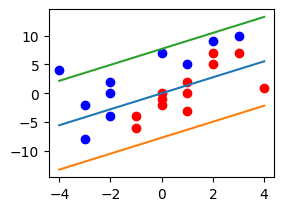

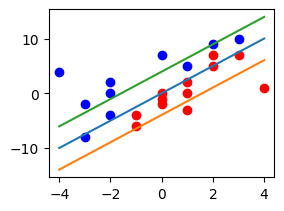

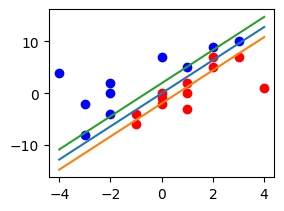

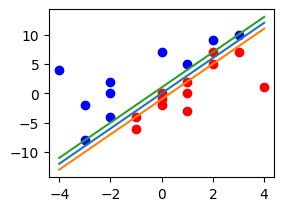

In [44]:
count = 1
for C in [0.01, 0.1, 1, 10]:
    alpha_star, w_star = soft_SVM(C)[0], soft_SVM(C)[1]
    plt.subplot(2,2,count)
    plot_db(w_star)
    count+=1